In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('movies2.csv')

In [3]:
df

,başlık,özet,tür,vizyon_tarihi,oyuncular,yönetmen,resim_link
0,Esaretin Bedeli,"Esaretin Bedeli, Andy ve Red isimli iki mahkum...",['Dram'],11 Mart 2021,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']",['Frank Darabont'],https://tr.web.img4.acsta.net/c_310_420/pictur...
1,Hababam Sınıfı,Öğrencilik hayatları haylazlık ve tembellik üz...,['Dramatik komedi'],None,"['Münir Özkul', 'Tarık Akan', 'Adile Naşit']",['Ertem Eğilmez'],https://tr.web.img2.acsta.net/c_310_420/pictur...
2,Baba,"Baba, 40’lar ve 50’lerin Amerika’sında, bir İt...","['Polisiye', 'Dram']",None,"['Marlon Brando', 'Al Pacino', 'James Caan']",['Francis Ford Coppola'],https://tr.web.img4.acsta.net/c_310_420/medias...
3,Eşkıya,"Eşkiya, hapse düşmesine neden olan arkadaşının...",['Dram'],None,"['Şener Şen', 'Uğur Yücel', 'Yeşim Salkım']",['Yavuz Turgul'],https://tr.web.img2.acsta.net/c_310_420/pictur...
4,Cesuryürek,"Cesuryürek'te, William Wallace yaşanan büyük a...","['Biyografik', 'Dram']",None,"['Mel Gibson', 'Sophie Marceau', 'Catherine Mc...",['Mel Gibson'],https://tr.web.img3.acsta.net/c_310_420/pictur...
...,...,...,...,...,...,...,...
3412,Neşeli Pazar,Claude Massoulier’ün av yaptığı mekanda öldürü...,['Polisiye'],None,"['Fanny Ardant', 'Jean-Louis Trintignant', 'Je...",['François Truffaut'],https://tr.web.img3.acsta.net/c_310_420/pictur...
3413,Uzaydan Gelen Fırtına,"Dünya'nın önde gelen liderleri, eşi benzeri gö...","['Bilimkurgu', 'Aksiyon']",20 Ekim 2017,"['Gerard Butler', 'Jim Sturgess', 'Abbie Corni...",['Dean Devlin'],https://tr.web.img4.acsta.net/c_310_420/pictur...
3414,Carrie: Günah Tohumu,Carrie White okulda arkadaşlarının sürekli dal...,['Korku'],8 Kasım 2013,"['Chloë Grace Moretz', 'Julianne Moore', 'Judy...",['Kimberly Peirce'],https://tr.web.img4.acsta.net/c_310_420/pictur...
3415,İbo ile Güllüşah,"Sevdiği kızla, Nazlı'yla hayatını birleştirmey...",['Komedi'],None,"['Kemal Sunal', 'Gülşah Soydan', 'Ayşen Gruda']",['Atıf Yılmaz'],https://tr.web.img3.acsta.net/c_310_420/pictur...


In [4]:
import spacy
import string
import gensim
import operator
import re

In [6]:
!pip install stop_words
from stop_words import get_stop_words
stopwords = get_stop_words('turkish')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=4573f96cea2b70d31a9d1fe7eb3954f5858205c29a3f5c28e2e860f6acb3b4f7
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [21]:
df.özet = df.özet.str.lower()

In [22]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
df['token']=df['özet'].apply(lambda X: word_tokenize(X))
df 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,başlık,özet,tür,vizyon_tarihi,oyuncular,yönetmen,resim_link,token
0,Esaretin Bedeli,"esaretin bedeli, andy ve red isimli iki mahkum...",['Dram'],11 Mart 2021,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']",['Frank Darabont'],https://tr.web.img4.acsta.net/c_310_420/pictur...,"[esaretin, bedeli, ,, andy, ve, red, isimli, i..."
1,Hababam Sınıfı,öğrencilik hayatları haylazlık ve tembellik üz...,['Dramatik komedi'],None,"['Münir Özkul', 'Tarık Akan', 'Adile Naşit']",['Ertem Eğilmez'],https://tr.web.img2.acsta.net/c_310_420/pictur...,"[öğrencilik, hayatları, haylazlık, ve, tembell..."
2,Baba,"baba, 40’lar ve 50’lerin amerika’sında, bir i̇...","['Polisiye', 'Dram']",None,"['Marlon Brando', 'Al Pacino', 'James Caan']",['Francis Ford Coppola'],https://tr.web.img4.acsta.net/c_310_420/medias...,"[baba, ,, 40, ’, lar, ve, 50, ’, lerin, amerik..."
3,Eşkıya,"eşkiya, hapse düşmesine neden olan arkadaşının...",['Dram'],None,"['Şener Şen', 'Uğur Yücel', 'Yeşim Salkım']",['Yavuz Turgul'],https://tr.web.img2.acsta.net/c_310_420/pictur...,"[eşkiya, ,, hapse, düşmesine, neden, olan, ark..."
4,Cesuryürek,"cesuryürek'te, william wallace yaşanan büyük a...","['Biyografik', 'Dram']",None,"['Mel Gibson', 'Sophie Marceau', 'Catherine Mc...",['Mel Gibson'],https://tr.web.img3.acsta.net/c_310_420/pictur...,"[cesuryürek'te, ,, william, wallace, yaşanan, ..."
...,...,...,...,...,...,...,...,...
3412,Neşeli Pazar,claude massoulier’ün av yaptığı mekanda öldürü...,['Polisiye'],None,"['Fanny Ardant', 'Jean-Louis Trintignant', 'Je...",['François Truffaut'],https://tr.web.img3.acsta.net/c_310_420/pictur...,"[claude, massoulier, ’, ün, av, yaptığı, mekan..."
3413,Uzaydan Gelen Fırtına,"dünya'nın önde gelen liderleri, eşi benzeri gö...","['Bilimkurgu', 'Aksiyon']",20 Ekim 2017,"['Gerard Butler', 'Jim Sturgess', 'Abbie Corni...",['Dean Devlin'],https://tr.web.img4.acsta.net/c_310_420/pictur...,"[dünya'nın, önde, gelen, liderleri, ,, eşi, be..."
3414,Carrie: Günah Tohumu,carrie white okulda arkadaşlarının sürekli dal...,['Korku'],8 Kasım 2013,"['Chloë Grace Moretz', 'Julianne Moore', 'Judy...",['Kimberly Peirce'],https://tr.web.img4.acsta.net/c_310_420/pictur...,"[carrie, white, okulda, arkadaşlarının, sürekl..."
3415,İbo ile Güllüşah,"sevdiği kızla, nazlı'yla hayatını birleştirmey...",['Komedi'],None,"['Kemal Sunal', 'Gülşah Soydan', 'Ayşen Gruda']",['Atıf Yılmaz'],https://tr.web.img3.acsta.net/c_310_420/pictur...,"[sevdiği, kızla, ,, nazlı'yla, hayatını, birle..."


In [24]:
nltk.download('stopwords')
from nltk.corpus import stopwords
tr_stopwords = stopwords.words('turkish')

def remove_stopwords(text):
    result = []
    for token in text:
        if token not in tr_stopwords:
            result.append(token)
            
    return result

df['token'] = df['token'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
df

,başlık,özet,tür,vizyon_tarihi,oyuncular,yönetmen,resim_link,token
0,Esaretin Bedeli,"esaretin bedeli, andy ve red isimli iki mahkum...",['Dram'],11 Mart 2021,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']",['Frank Darabont'],https://tr.web.img4.acsta.net/c_310_420/pictur...,"[esaretin, bedeli, ,, andy, red, isimli, iki, ..."
1,Hababam Sınıfı,öğrencilik hayatları haylazlık ve tembellik üz...,['Dramatik komedi'],None,"['Münir Özkul', 'Tarık Akan', 'Adile Naşit']",['Ertem Eğilmez'],https://tr.web.img2.acsta.net/c_310_420/pictur...,"[öğrencilik, hayatları, haylazlık, tembellik, ..."
2,Baba,"baba, 40’lar ve 50’lerin amerika’sında, bir i̇...","['Polisiye', 'Dram']",None,"['Marlon Brando', 'Al Pacino', 'James Caan']",['Francis Ford Coppola'],https://tr.web.img4.acsta.net/c_310_420/medias...,"[baba, ,, 40, ’, lar, 50, ’, lerin, amerika, ’..."
3,Eşkıya,"eşkiya, hapse düşmesine neden olan arkadaşının...",['Dram'],None,"['Şener Şen', 'Uğur Yücel', 'Yeşim Salkım']",['Yavuz Turgul'],https://tr.web.img2.acsta.net/c_310_420/pictur...,"[eşkiya, ,, hapse, düşmesine, olan, arkadaşını..."
4,Cesuryürek,"cesuryürek'te, william wallace yaşanan büyük a...","['Biyografik', 'Dram']",None,"['Mel Gibson', 'Sophie Marceau', 'Catherine Mc...",['Mel Gibson'],https://tr.web.img3.acsta.net/c_310_420/pictur...,"[cesuryürek'te, ,, william, wallace, yaşanan, ..."
...,...,...,...,...,...,...,...,...
3412,Neşeli Pazar,claude massoulier’ün av yaptığı mekanda öldürü...,['Polisiye'],None,"['Fanny Ardant', 'Jean-Louis Trintignant', 'Je...",['François Truffaut'],https://tr.web.img3.acsta.net/c_310_420/pictur...,"[claude, massoulier, ’, ün, av, yaptığı, mekan..."
3413,Uzaydan Gelen Fırtına,"dünya'nın önde gelen liderleri, eşi benzeri gö...","['Bilimkurgu', 'Aksiyon']",20 Ekim 2017,"['Gerard Butler', 'Jim Sturgess', 'Abbie Corni...",['Dean Devlin'],https://tr.web.img4.acsta.net/c_310_420/pictur...,"[dünya'nın, önde, gelen, liderleri, ,, eşi, be..."
3414,Carrie: Günah Tohumu,carrie white okulda arkadaşlarının sürekli dal...,['Korku'],8 Kasım 2013,"['Chloë Grace Moretz', 'Julianne Moore', 'Judy...",['Kimberly Peirce'],https://tr.web.img4.acsta.net/c_310_420/pictur...,"[carrie, white, okulda, arkadaşlarının, sürekl..."
3415,İbo ile Güllüşah,"sevdiği kızla, nazlı'yla hayatını birleştirmey...",['Komedi'],None,"['Kemal Sunal', 'Gülşah Soydan', 'Ayşen Gruda']",['Atıf Yılmaz'],https://tr.web.img3.acsta.net/c_310_420/pictur...,"[sevdiği, kızla, ,, nazlı'yla, hayatını, birle..."


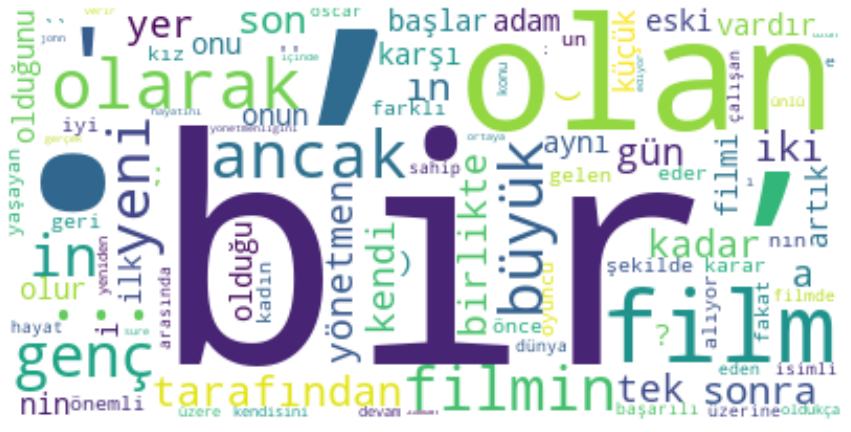

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

series = pd.Series(np.concatenate(df.token)).value_counts()[:100]
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)

plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
from gensim import corpora

#creating term dictionary
dictionary = corpora.Dictionary(df.token)


In [30]:
corpus = [dictionary.doc2bow(desc) for desc in df.token]

word_frequencies = [[(dictionary[id], frequency) for id, frequency in line] for line in corpus[0:3]]

print(word_frequencies)

[[("'", 1), (',', 8), ('.', 8), ("1995'te", 1), ('7', 1), (':', 1), ('a', 1), ('aday', 1), ('adaylığı', 1), ('alır', 1), ('andy', 4), ("andy'nin", 1), ('anlatıyor', 1), ('aralarında', 1), ('ardında', 1), ('arkadaşı', 1), ('arkasında', 1), ('açısıyla', 1), ('bakış', 1), ('bankerdir', 1), ('bağlı', 1), ('başarılı', 1), ('başrolde', 1), ('bedeli', 1), ('bile', 1), ('bir', 3), ('boyu', 1), ('cezası', 1), ('dalda', 1), ('dayak', 1), ('dufresne', 1), ('durum', 1), ('dünyanın', 1), ('esaretin', 1), ('etkiler', 1), ('etrafındakileri', 1), ('fakat', 1), ('film', 2), ('filmde', 1), ('freeman', 1), ('gene', 1), ('genç', 1), ('gösterildi', 1), ('hapis', 1), ("hapishanesi'nde", 1), ('hayata', 1), ('hikayesini', 1), ('iki', 1), ('inandırır', 1), ('isimli', 1), ('iyi', 1), ('iyimserdir', 1), ('işkence', 1), ('karısını', 1), ('karısının', 1), ('king', 1), ('kurdukları', 1), ('mahkumları', 1), ('mahkumun', 1), ('morgan', 1), ('olabileceğine', 1), ('olacak', 1), ('olacaktır', 1), ('olan', 1), ('olmak', 

In [31]:
%time movie_tfidf_model = gensim.models.TfidfModel(corpus, id2word=dictionary)
%time movie_lsi_model = gensim.models.LsiModel(movie_tfidf_model[corpus], id2word=dictionary, num_topics=300)

CPU times: user 385 ms, sys: 9.11 ms, total: 394 ms
Wall time: 460 ms
CPU times: user 18.2 s, sys: 1.31 s, total: 19.5 s
Wall time: 12.4 s


In [32]:
%time gensim.corpora.MmCorpus.serialize('movie_tfidf_model_mm', movie_tfidf_model[corpus])
%time gensim.corpora.MmCorpus.serialize('movie_lsi_model_mm',movie_lsi_model[movie_tfidf_model[corpus]])

CPU times: user 3.12 s, sys: 56.6 ms, total: 3.18 s
Wall time: 3.59 s
CPU times: user 4.29 s, sys: 70.5 ms, total: 4.36 s
Wall time: 4.36 s


In [33]:
movie_tfidf_corpus = gensim.corpora.MmCorpus('movie_tfidf_model_mm')
movie_lsi_corpus = gensim.corpora.MmCorpus('movie_lsi_model_mm')

print(movie_tfidf_corpus)
print(movie_lsi_corpus)

MmCorpus(3417 documents, 52835 features, 270613 non-zero entries)
MmCorpus(3417 documents, 300 features, 1025100 non-zero entries)


In [34]:
from gensim.similarities import MatrixSimilarity

%time movie_index = MatrixSimilarity(movie_lsi_corpus, num_features = movie_lsi_corpus.num_terms)

CPU times: user 2.26 s, sys: 42.5 ms, total: 2.3 s
Wall time: 3.1 s


In [35]:
from operator import itemgetter

def search_similar_movies(search_term):

    query_bow = dictionary.doc2bow(word_tokenize(search_term))
    query_tfidf = movie_tfidf_model[query_bow]
    query_lsi = movie_lsi_model[query_tfidf]

    movie_index.num_best = 5

    movies_list = movie_index[query_lsi]

    movies_list.sort(key=itemgetter(1), reverse=True)
    movie_names = []

    for j, movie in enumerate(movies_list):

        movie_names.append (
            {
                'Yakınlık': round((movie[1] * 100),2),
                'Film Adı': df['başlık'][movie[0]],
                'Film Hakkında': df['özet'][movie[0]]
            }

        )
        if j == (movie_index.num_best-1):
            break

    return pd.DataFrame(movie_names, columns=['Yakınlık','Film Adı','Film Hakkında'])


In [37]:
search_similar_movies('uyuşturucu yoluyla beynini geliştiren kadın')

,Yakınlık,Film Adı,Film Hakkında
0,60.93,Cennet,"philippa isimli kadın, torino, i̇talya'da öğre..."
1,52.58,Lucy,tayvan'ın başkenti taipei'nin suça batmış yera...
2,51.54,İntikam Ateşi,"sean vatter, kendi camiasının öne çıkan birkaç..."
3,41.63,Veronica Guerin,"veronica guerin, dublin sunday independent gaz..."
4,41.21,Çılgın İkili 2,narkotikten sorumlu polisler mike lowrey ve ma...


In [43]:
search_similar_movies('Mafya ailesinin içindeki anlaşmazlıkları anlatan film')

,Yakınlık,Film Adı,Film Hakkında
0,42.14,Prangalı Hapishane Kaçağıyım,amerika’nın güney bölgesindeki hapishanelerin ...
1,38.39,Ocean Heaven,"bir balıkçı kasabasında yaşayan babanın, otizm..."
2,34.76,Moonrise Kingdom,samimi ve içten aile hikayeleri ile kendi hatı...
3,34.11,Umuda Yolculuk,"film, türkiye’de yaşayan maraşlı bir alevi ail..."
4,31.72,Ölümsüz Anlar,1900’lerin başında i̇sveç’teyiz. halkın savaş ...
